<a href="https://colab.research.google.com/github/dzervenes/dzervenes.github.io/blob/master/Unit_4_Seminar_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

 sample_data  'Unit04 Global_GDP.csv'  'Unit04 Global_Population.csv'


**Loading the csv files**

In [ ]:
import pandas as pd
df1 = pd.read_csv('Unit04 Global_GDP.csv')
df2 = pd.read_csv('Unit04 Global_Population.csv')

**Inspecting the data**

In [ ]:
print(df1.head())
print(df2.head())

                  Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1  NY.GDP.MKTP.CD  1.929944e+10  1.970954e+10  2.147872e+10  2.571501e+10   
2  NY.GDP.MKTP.CD  5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   
3  NY.GDP.MKTP.CD  1.040428e+10  1.112805e+10  1.194335e+10  1.267652e+10   
4  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   

           1964          1965  ...          2011          2012          2013  \
0           NaN           NaN  ...  2.549721e+09  2.534637e+

**Data overview**

These datasets encompass GDP and population data for a wide range of countries and regions from 1960 to 2021. GDP values, measured in current US dollars, reflect annual economic output, while population figures provide a record of total inhabitants over the same timeframe. Although population data is largely complete, there are some gaps, such as missing entries for Aruba in 2020 and 2021. GDP data, on the other hand, exhibits more substantial missing values, especially for smaller economies and earlier years, necessitating careful preprocessing to ensure robust analysis.

**Identifying missing values**

In [ ]:
print("Missing values in GDP data:")
print(df1.isnull().sum())

print("\nMissing values in Population data:")
print(df2.isnull().sum())

Missing values in GDP data:
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              138
                 ... 
2016               10
2017               10
2018               10
2019               13
2020               25
Length: 65, dtype: int64

Missing values in Population data:
Country Name    3
Country Code    5
Series Name     5
Series Code     5
1960            5
               ..
2017            5
2018            5
2019            5
2020            6
2021            6
Length: 66, dtype: int64


**Filling missing values**


This code handles missing values in GDP and population data. It identifies columns representing years, fills missing GDP values with the column mean, and converts population data to numeric, replacing non-numeric entries with NaN. Missing population values are then filled with the column mean. Finally, it checks and prints the remaining missing values to ensure the data is clean and consistent for analysis.

In [ ]:
# extracting the GDP year columns
year_columns = df1.columns[df1.columns.str.isnumeric()]

df1[year_columns] = df1[year_columns].fillna(df1[year_columns].mean())

print("Missing values in GDP data after filling:")
print(df1.isnull().sum())

# extracting the population year columns
year_columns = df2.columns[df2.columns.str.isnumeric()]

df2[year_columns] = df2[year_columns].apply(pd.to_numeric, errors='coerce')
df2[year_columns] = df2[year_columns].fillna(df2[year_columns].mean())
print(df2.isnull().sum())

Missing values in GDP data after filling:
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2016              0
2017              0
2018              0
2019              0
2020              0
Length: 65, dtype: int64
Country Name    3
Country Code    5
Series Name     5
Series Code     5
1960            0
               ..
2017            0
2018            0
2019            0
2020            0
2021            0
Length: 66, dtype: int64


**Handling non-numeric missing values**

After handling numeric missing values in the datasets, I noticed there were some non-numeric missing values in the population data. To address this, I replaced the non-numeric missing values with the placeholder "Unknown". This ensures that the dataset remains complete without losing rows, making it ready for further analysis.

In [ ]:
df2 = df2.fillna("Unknown")

print("Non-numeric missing values handled in Population data:")
print(df2.isnull().sum())

Non-numeric missing values handled in Population data:
Country Name    0
Country Code    0
Series Name     0
Series Code     0
1960            0
               ..
2017            0
2018            0
2019            0
2020            0
2021            0
Length: 66, dtype: int64


**Calculating mean population and mean per capita GDP for each country**

In this section, I preprocess the data to compute the mean population and mean GDP per capita for each country from 2001 to 2021. The population data already contains data for all the required years, so I calculate the mean directly across the columns representing the years 2001 to 2021.

In the GDP dataset, the column for the year 2021 was missing. To address this, I added a placeholder column for 2021 with NaN values and performed linear interpolation using the data from 2020. After ensuring all necessary year columns were complete, I calculated the mean GDP per capita for each country.

This preprocessing ensures consistency across datasets and prepares the data for further analysis.

In [ ]:
# identify year columns (2001-2021)
year_columns_2001_2021 = [col for col in year_columns if int(col) >= 2001 and int(col) <= 2021]

df2['Mean_Population'] = df2[year_columns_2001_2021].mean(axis=1)
print("Mean Population (2001–2021) for each country:")
print(df2[['Country Name', 'Mean_Population']])

import numpy as np
# Add a placeholder column for 2021 with NaN values
df1['2021'] = np.nan

# Convert the 2021 column to numeric type
df1['2021'] = pd.to_numeric(df1['2021'], errors='coerce')

# Interpolate missing values for all numeric columns
df1['2021'] = df1[['2020', '2021']].interpolate(method='linear', axis=1)['2021']

df1['Mean_GDP'] = df1[year_columns].mean(axis=1)
print("\nMean GDP (2001–2021) for each country:")
print(df1[['Country Name', 'Mean_GDP']])

Mean Population (2001–2021) for each country:
                                          Country Name  Mean_Population
0                                                Aruba     2.815266e+07
1                                          Afghanistan     3.067118e+07
2                          Africa Eastern and Southern     5.398680e+08
3                           Africa Western and Central     3.647774e+08
4                                              Albania     2.930953e+06
..                                                 ...              ...
267                                            Unknown     2.597370e+08
268                                            Unknown     2.597370e+08
269                                            Unknown     2.597370e+08
270  Data from database: Population estimates and p...     2.597370e+08
271                           Last Updated: 12/17/2021     2.597370e+08

[272 rows x 2 columns]

Mean GDP (2001–2021) for each country:
                    Countr

**Merging the DataFrames**

In [ ]:
merged_data = pd.merge(
    df2[['Country Name', 'Mean_Population']],
    df1[['Country Name', 'Mean_GDP']],
    on='Country Name'
)
print(merged_data.head())

                  Country Name  Mean_Population      Mean_GDP
0                        Aruba     2.815266e+07  2.409359e+11
1                  Afghanistan     3.067118e+07  2.553337e+11
2  Africa Eastern and Southern     5.398680e+08  3.420686e+11
3   Africa Western and Central     3.647774e+08  2.446066e+11
4                      Albania     2.930953e+06  8.920771e+10


**Correlation Scatter Plot**

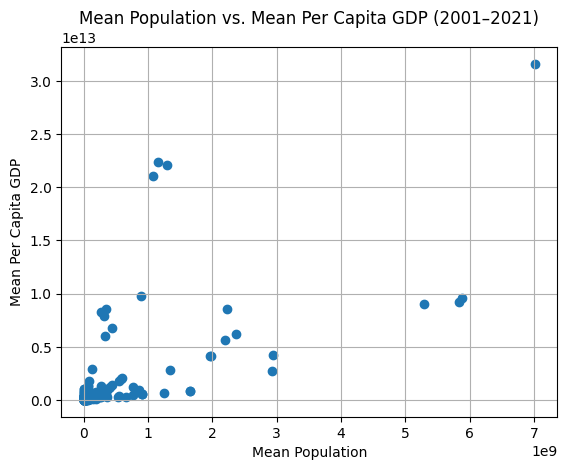

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(merged_data['Mean_Population'], merged_data['Mean_GDP'])
plt.title('Mean Population vs. Mean Per Capita GDP (2001–2021)')
plt.xlabel('Mean Population')
plt.ylabel('Mean Per Capita GDP')
plt.grid(True)
plt.show()

**Interpretation of Scatter Plot**

The scatter plot shows no clear linear relationship between the mean population and the mean per capita GDP from 2001 to 2021. Most countries are clustered in the lower-left corner, indicating low population and low per capita GDP. A few outliers are present, with one country having an extremely high population and GDP per capita, while others with low populations exhibit varying GDP levels. The dispersion of points suggests a weak or insignificant correlation, which can be confirmed by evaluating the Pearson Correlation Coefficient.

**Pearson correlation coefficient**

In [ ]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(merged_data['Mean_Population'], merged_data['Mean_GDP'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.6663416327398358
P-value: 1.217448183511333e-35


The results show a moderate to strong positive correlation between the mean population and the mean per capita GDP from 2001 to 2021, with a Pearson Correlation Coefficient of 0.6663. This indicates that, on average, countries with larger populations are associated with higher GDP per capita. The p-value (
1.217x10-35) confirms that this relationship is statistically significant, meaning it is highly unlikely to have occurred by chance.

The scatter plot reveals a clustering of countries with low population and GDP per capita, along with a few notable outliers. These outliers suggest that while population plays a role, other factors likely influence GDP per capita. Further investigation could help clarify the impact of these additional variables and refine the analysis.

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Independent variable
X = merged_data[['Mean_Population']].values

# Dependent variable
y = merged_data['Mean_GDP'].values

model=LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): 2666.3168320384134
Intercept: 350148621850.64246


**Predicting GPD using the trained regression model**

I use the trained regression model to predict mean per capita GDP based on the mean population values. These predictions help visualize the regression line and assess how well the model captures the relationship between the variables.

In [ ]:
y_pred = model.predict(X)

**Scatter Plot**

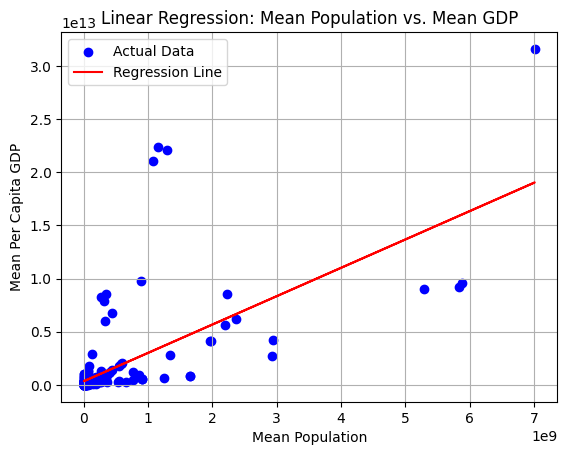

In [ ]:
# Scatter plot of the actual data
plt.scatter(X, y, label='Actual Data', color='blue')

# Plot the regression line
plt.plot(X, y_pred, label='Regression Line', color='red')

# Add labels and title
plt.title('Linear Regression: Mean Population vs. Mean GDP')
plt.xlabel('Mean Population')
plt.ylabel('Mean Per Capita GDP')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation**

This plot illustrates the relationship between the mean population and the mean per capita GDP from 2001 to 2021. The regression line indicates a positive trend, suggesting that countries with larger populations tend to have higher GDP per capita. However, the scattered data points and the presence of outliers show that the relationship is not perfectly linear. Most countries are clustered in the lower-left corner, representing smaller populations and lower GDP per capita, while a few outliers with larger populations significantly influence the trend.

**Evaluation of regression model**

In [ ]:
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")

R-squared: 0.44401117152239034


The R2 value of 0.4440 indicates that 44.4% of the variability in mean per capita GDP can be explained by the mean population. This suggests a moderate relationship, with the remaining variability likely influenced by other factors not captured in the model. While population has an impact, it is not the sole determinant of GDP per capita.